# Training an OAE to reduce the dimension of the input by nonlinear mapping

In [2]:
# Importing libraries and methods
import numpy as np
import pandas as pd
from feature_extraction.oae_fit_transform import DimensionalityReductionOAE
import os
import random
import torch

In [3]:
# Importing data
# TEP: we use Stream9E (purge composition measurement)
df = pd.read_csv("/Users/dcac/Desktop/PhD/Data/TEP/Extended/tep_extended_compositions_1min.csv")
cols_to_drop = ['Stream9A', 'Stream9B', 'Stream9C', 'Stream9D', 'Stream9E', 'Stream9F', 'Stream9G', 'Stream9H',
                'Stream11D', 'Stream11E', 'Stream11F', 'Stream11G', 'Stream11H']
cols_to_drop_updated = [col for col in cols_to_drop if col != 'Stream9E']
df = df.drop(cols_to_drop_updated, axis=1)
df.rename(columns={'Stream9E': 'y'}, inplace=True)

# Taking last run to fit OAE
training_set = df[df["RUN"] == 59].drop("RUN", axis=1)

[   1/1000] train_loss: 9497.888801 valid_loss: 6086.214993
Validation loss decreased (inf --> 6086.214993).  Saving model ...
[   2/1000] train_loss: 7491.568239 valid_loss: 6818.102752
EarlyStopping counter: 1 out of 10
[   3/1000] train_loss: 6224.566536 valid_loss: 5529.828531
Validation loss decreased (6086.214993 --> 5529.828531).  Saving model ...
[   4/1000] train_loss: 5198.650961 valid_loss: 4532.636891
Validation loss decreased (5529.828531 --> 4532.636891).  Saving model ...
[   5/1000] train_loss: 4362.927936 valid_loss: 3822.291748
Validation loss decreased (4532.636891 --> 3822.291748).  Saving model ...
[   6/1000] train_loss: 3672.914403 valid_loss: 3285.313703
Validation loss decreased (3822.291748 --> 3285.313703).  Saving model ...
[   7/1000] train_loss: 3105.740918 valid_loss: 2677.689485
Validation loss decreased (3285.313703 --> 2677.689485).  Saving model ...
[   8/1000] train_loss: 2642.033635 valid_loss: 2317.251463
Validation loss decreased (2677.689485 --> 

[  65/1000] train_loss: 12.149395 valid_loss: 10.982046
Validation loss decreased (11.855292 --> 10.982046).  Saving model ...
[  66/1000] train_loss: 11.415560 valid_loss: 10.224300
Validation loss decreased (10.982046 --> 10.224300).  Saving model ...
[  67/1000] train_loss: 10.731255 valid_loss: 9.704868
Validation loss decreased (10.224300 --> 9.704868).  Saving model ...
[  68/1000] train_loss: 10.096114 valid_loss: 9.436969
Validation loss decreased (9.704868 --> 9.436969).  Saving model ...
[  69/1000] train_loss: 9.501892 valid_loss: 8.812246
Validation loss decreased (9.436969 --> 8.812246).  Saving model ...
[  70/1000] train_loss: 8.950186 valid_loss: 8.423225
Validation loss decreased (8.812246 --> 8.423225).  Saving model ...
[  71/1000] train_loss: 8.431250 valid_loss: 7.584281
Validation loss decreased (8.423225 --> 7.584281).  Saving model ...
[  72/1000] train_loss: 7.949983 valid_loss: 7.433499
Validation loss decreased (7.584281 --> 7.433499).  Saving model ...
[  73

[ 132/1000] train_loss: 0.728832 valid_loss: 0.726920
Validation loss decreased (0.739074 --> 0.726920).  Saving model ...
[ 133/1000] train_loss: 0.715387 valid_loss: 0.720081
Validation loss decreased (0.726920 --> 0.720081).  Saving model ...
[ 134/1000] train_loss: 0.702665 valid_loss: 0.705148
Validation loss decreased (0.720081 --> 0.705148).  Saving model ...
[ 135/1000] train_loss: 0.690225 valid_loss: 0.682236
Validation loss decreased (0.705148 --> 0.682236).  Saving model ...
[ 136/1000] train_loss: 0.678697 valid_loss: 0.674590
Validation loss decreased (0.682236 --> 0.674590).  Saving model ...
[ 137/1000] train_loss: 0.667217 valid_loss: 0.669952
Validation loss decreased (0.674590 --> 0.669952).  Saving model ...
[ 138/1000] train_loss: 0.656083 valid_loss: 0.659882
Validation loss decreased (0.669952 --> 0.659882).  Saving model ...
[ 139/1000] train_loss: 0.644495 valid_loss: 0.646067
Validation loss decreased (0.659882 --> 0.646067).  Saving model ...
[ 140/1000] trai

[ 205/1000] train_loss: 0.368057 valid_loss: 0.384729
Validation loss decreased (0.389099 --> 0.384729).  Saving model ...
[ 206/1000] train_loss: 0.365489 valid_loss: 0.376603
Validation loss decreased (0.384729 --> 0.376603).  Saving model ...
[ 207/1000] train_loss: 0.362866 valid_loss: 0.378961
EarlyStopping counter: 1 out of 10
[ 208/1000] train_loss: 0.360094 valid_loss: 0.378493
EarlyStopping counter: 2 out of 10
[ 209/1000] train_loss: 0.358388 valid_loss: 0.368911
Validation loss decreased (0.376603 --> 0.368911).  Saving model ...
[ 210/1000] train_loss: 0.355715 valid_loss: 0.371031
EarlyStopping counter: 1 out of 10
[ 211/1000] train_loss: 0.352869 valid_loss: 0.359428
Validation loss decreased (0.368911 --> 0.359428).  Saving model ...
[ 212/1000] train_loss: 0.350672 valid_loss: 0.371253
EarlyStopping counter: 1 out of 10
[ 213/1000] train_loss: 0.348088 valid_loss: 0.357840
Validation loss decreased (0.359428 --> 0.357840).  Saving model ...
[ 214/1000] train_loss: 0.345

[ 280/1000] train_loss: 0.200045 valid_loss: 0.209044
EarlyStopping counter: 2 out of 10
[ 281/1000] train_loss: 0.198617 valid_loss: 0.207420
EarlyStopping counter: 3 out of 10
[ 282/1000] train_loss: 0.198007 valid_loss: 0.207781
EarlyStopping counter: 4 out of 10
[ 283/1000] train_loss: 0.196486 valid_loss: 0.208779
EarlyStopping counter: 5 out of 10
[ 284/1000] train_loss: 0.195372 valid_loss: 0.202259
Validation loss decreased (0.207074 --> 0.202259).  Saving model ...
[ 285/1000] train_loss: 0.195696 valid_loss: 0.199317
Validation loss decreased (0.202259 --> 0.199317).  Saving model ...
[ 286/1000] train_loss: 0.194798 valid_loss: 0.201238
EarlyStopping counter: 1 out of 10
[ 287/1000] train_loss: 0.193018 valid_loss: 0.193458
Validation loss decreased (0.199317 --> 0.193458).  Saving model ...
[ 288/1000] train_loss: 0.192644 valid_loss: 0.199309
EarlyStopping counter: 1 out of 10
[ 289/1000] train_loss: 0.192198 valid_loss: 0.194725
EarlyStopping counter: 2 out of 10
[ 290/10

[ 362/1000] train_loss: 0.140805 valid_loss: 0.141971
Validation loss decreased (0.142344 --> 0.141971).  Saving model ...
[ 363/1000] train_loss: 0.139371 valid_loss: 0.140896
Validation loss decreased (0.141971 --> 0.140896).  Saving model ...
[ 364/1000] train_loss: 0.138738 valid_loss: 0.140028
Validation loss decreased (0.140896 --> 0.140028).  Saving model ...
[ 365/1000] train_loss: 0.139029 valid_loss: 0.142058
EarlyStopping counter: 1 out of 10
[ 366/1000] train_loss: 0.138167 valid_loss: 0.137021
Validation loss decreased (0.140028 --> 0.137021).  Saving model ...
[ 367/1000] train_loss: 0.137295 valid_loss: 0.139572
EarlyStopping counter: 1 out of 10
[ 368/1000] train_loss: 0.136440 valid_loss: 0.134268
Validation loss decreased (0.137021 --> 0.134268).  Saving model ...
[ 369/1000] train_loss: 0.136377 valid_loss: 0.136456
EarlyStopping counter: 1 out of 10
[ 370/1000] train_loss: 0.135310 valid_loss: 0.136137
EarlyStopping counter: 2 out of 10
[ 371/1000] train_loss: 0.134

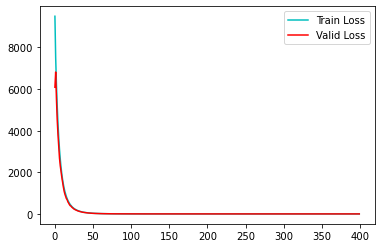

In [4]:
# Fitting OAE
projection = DimensionalityReductionOAE(initial_train_set=training_set)
seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
projection.fit(encoding_layers=[16, 160, 80, 40, 20, 10], penalty_term=0.1, nr_epochs=1000, patience=10, 
               batch=1000, verbose=True)